# ENHANCING USER AUTHENTICATION EXPERIENCE THROUGH BIG DATA ANALYSIS AND SINGLE SIGN-ON INTEGRATION
## K-MEANS ALGORITHM

In [560]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [561]:
df = pd.read_csv('rba-dataset.csv', nrows=2000, index_col='index')

In [562]:
df.dropna(inplace=True)

In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 15 to 1990
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Login Timestamp           81 non-null     object 
 1   User ID                   81 non-null     int64  
 2   Round-Trip Time [ms]      81 non-null     float64
 3   IP Address                81 non-null     object 
 4   Country                   81 non-null     object 
 5   Region                    81 non-null     object 
 6   City                      81 non-null     object 
 7   ASN                       81 non-null     int64  
 8   User Agent String         81 non-null     object 
 9   Browser Name and Version  81 non-null     object 
 10  OS Name and Version       81 non-null     object 
 11  Device Type               81 non-null     object 
 12  Login Successful          81 non-null     bool   
 13  Is Attack IP              81 non-null     bool   
 14  Is Account Tak

In [564]:
df_feature = ['Login Timestamp', 'IP Address', 'Browser Name and Version', 'OS Name and Version', 
              'Device Type', 'Login Successful', 'Is Attack IP', 'Is Account Takeover']

In [565]:
data = df[df_feature]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 15 to 1990
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Login Timestamp           81 non-null     object
 1   IP Address                81 non-null     object
 2   Browser Name and Version  81 non-null     object
 3   OS Name and Version       81 non-null     object
 4   Device Type               81 non-null     object
 5   Login Successful          81 non-null     bool  
 6   Is Attack IP              81 non-null     bool  
 7   Is Account Takeover       81 non-null     bool  
dtypes: bool(3), object(5)
memory usage: 4.0+ KB


In [566]:

# Convert boolean columns to integers (True -> 1, False -> 0)
bool_columns = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
data[bool_columns] = data[bool_columns].astype(int)

# Label encode object columns
label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

C:\Users\workspace\AppData\Local\Temp\ipykernel_1064\2108848982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[bool_columns] = data[bool_columns].astype(int)
C:\Users\workspace\AppData\Local\Temp\ipykernel_1064\2108848982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])
C:\Users\workspace\AppData\Local\Temp\ipykernel_1064\2108848982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 15 to 1990
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Login Timestamp           81 non-null     int32
 1   IP Address                81 non-null     int32
 2   Browser Name and Version  81 non-null     int32
 3   OS Name and Version       81 non-null     int32
 4   Device Type               81 non-null     int32
 5   Login Successful          81 non-null     int32
 6   Is Attack IP              81 non-null     int32
 7   Is Account Takeover       81 non-null     int32
dtypes: int32(8)
memory usage: 3.2 KB


In [568]:
bool_columns = data.select_dtypes(include='bool').columns

# Loop through each boolean column and convert boolean values to integers
for column in bool_columns:
    data[column] = data[column].astype(int)

In [569]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 15 to 1990
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Login Timestamp           81 non-null     int32
 1   IP Address                81 non-null     int32
 2   Browser Name and Version  81 non-null     int32
 3   OS Name and Version       81 non-null     int32
 4   Device Type               81 non-null     int32
 5   Login Successful          81 non-null     int32
 6   Is Attack IP              81 non-null     int32
 7   Is Account Takeover       81 non-null     int32
dtypes: int32(8)
memory usage: 3.2 KB


In [570]:
data

,Login Timestamp,IP Address,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
index,,,,,,,,
15,0,51,1,14,0,1,0,0
41,1,49,11,11,0,1,0,0
51,2,56,1,14,1,0,0,0
76,3,35,3,3,1,1,0,0
108,4,2,2,9,0,1,0,0
...,...,...,...,...,...,...,...,...
1744,76,17,10,2,0,1,1,0
1748,77,13,10,11,0,1,1,0
1916,78,52,1,14,0,1,0,0


In [571]:
data.describe()

,Login Timestamp,IP Address,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,40.000000,28.320988,7.382716,10.444444,0.049383,0.703704,0.086420,0.0
std,23.526581,16.604086,5.231080,3.990614,0.218016,0.459468,0.282734,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,20.000000,17.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.0
50%,40.000000,25.000000,10.000000,11.000000,0.000000,1.000000,0.000000,0.0
75%,60.000000,42.000000,11.000000,14.000000,0.000000,1.000000,0.000000,0.0
max,80.000000,59.000000,18.000000,15.000000,1.000000,1.000000,1.000000,0.0


In [572]:
#scaled_df = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

scaler = StandardScaler()

In [573]:
# Scale the features
data[df_feature] = scaler.fit_transform(data[df_feature])

C:\Users\workspace\AppData\Local\Temp\ipykernel_1064\295899092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[df_feature] = scaler.fit_transform(data[df_feature])


In [574]:
data

,Login Timestamp,IP Address,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
index,,,,,,,,
15,-1.710798,1.374380,-1.227755,0.896531,-0.227921,0.648886,-0.307562,0.0
41,-1.668028,1.253177,0.695807,0.140083,-0.227921,0.648886,-0.307562,0.0
51,-1.625258,1.677386,-1.227755,0.896531,4.387482,-1.541104,-0.307562,0.0
76,-1.582488,0.404757,-0.843043,-1.877112,4.387482,0.648886,-0.307562,0.0
108,-1.539718,-1.595088,-1.035399,-0.364216,-0.227921,0.648886,-0.307562,0.0
...,...,...,...,...,...,...,...,...
1744,1.539718,-0.686068,0.503451,-2.129261,-0.227921,0.648886,3.251373,0.0
1748,1.582488,-0.928473,0.503451,0.140083,-0.227921,0.648886,3.251373,0.0
1916,1.625258,1.434981,-1.227755,0.896531,-0.227921,0.648886,-0.307562,0.0


In [575]:
def elbow_k_means_plot(dataset, max_k):
    # Define range of clusters (K) to try
    k_range = range(1, max_k) 

    # Initialize list to store inertia values
    inertia_values = []

    # Calculate inertia for each value of K
    for k in k_range:
        # Fit K-means clustering to the scaled data
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(dataset)
        
        # Append inertia to list
        inertia_values.append(kmeans.inertia_)

    # Plot elbow curve
    plt.plot(k_range, inertia_values, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

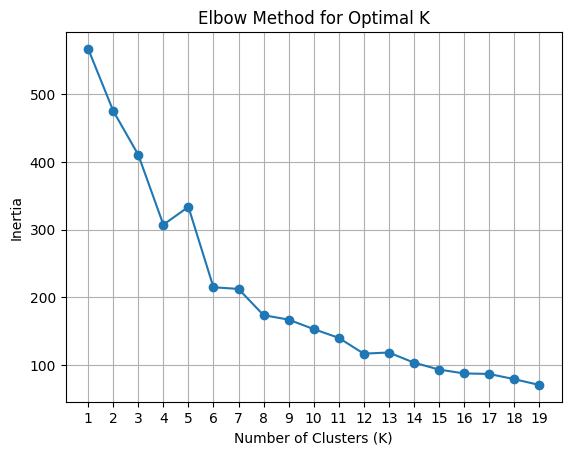

In [576]:
elbow_k_means_plot(data, 20)

In [577]:
k_means = KMeans(n_clusters=5)
k_means.fit(data[df_feature])

KMeans(n_clusters=5)

In [578]:
data['k_means'] = k_means.labels_

C:\Users\workspace\AppData\Local\Temp\ipykernel_1064\1826464156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['k_means'] = k_means.labels_


In [579]:
data.describe()

,Login Timestamp,IP Address,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,k_means
count,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.0,81.000000
mean,2.741291e-17,1.644775e-17,2.193033e-17,-3.426614e-17,1.082810e-16,-8.223874e-17,1.370646e-18,0.0,1.555556
std,1.006231e+00,1.006231e+00,1.006231e+00,1.006231e+00,1.006231e+00,1.006231e+00,1.006231e+00,0.0,1.303840
min,-1.710798e+00,-1.716291e+00,-1.420111e+00,-2.633560e+00,-2.279212e-01,-1.541104e+00,-3.075623e-01,0.0,0.000000
25%,-8.553989e-01,-6.860675e-01,-1.227755e+00,-1.120664e-01,-2.279212e-01,-1.541104e+00,-3.075623e-01,0.0,1.000000
50%,0.000000e+00,-2.012564e-01,5.034508e-01,1.400830e-01,-2.279212e-01,6.488857e-01,-3.075623e-01,0.0,1.000000
75%,8.553989e-01,8.289671e-01,6.958069e-01,8.965309e-01,-2.279212e-01,6.488857e-01,-3.075623e-01,0.0,3.000000
max,1.710798e+00,1.859191e+00,2.042300e+00,1.148680e+00,4.387482e+00,6.488857e-01,3.251373e+00,0.0,4.000000


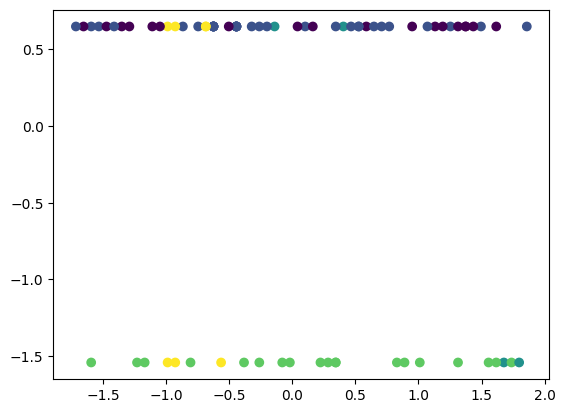

In [582]:
plt.scatter(x=data['IP Address'], y=data['Login Successful'], c=data['k_means'])
# plt.xlim(-, 60)
# plt.ylim(.5, 4)
plt.show()